In [82]:
! pip install python-louvain


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\topk-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [83]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain as louvain


In [ ]:
def Modularity_Clustering(G):
    partition = louvain.best_partition(G)

    communities = {}
    for node, cluster in partition.items():
        if cluster not in communities:
            communities[cluster] = [node]
        else:
            communities[cluster].append(node)
    return communities
    

In [ ]:
def Plot_Comminuty(G, Clusters):
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']

    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G)  
    for i, (nodes, color) in enumerate(zip(Clusters.values(), colors)):
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color, node_size=500, label=f'Cluster {i+1}')
    nx.draw_networkx_edges(G, pos, width=0.5, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_family='sans-serif')
    plt.title('Clustered Graph with Louvain Algorithm')
    plt.legend()
    plt.show()

# Orginal

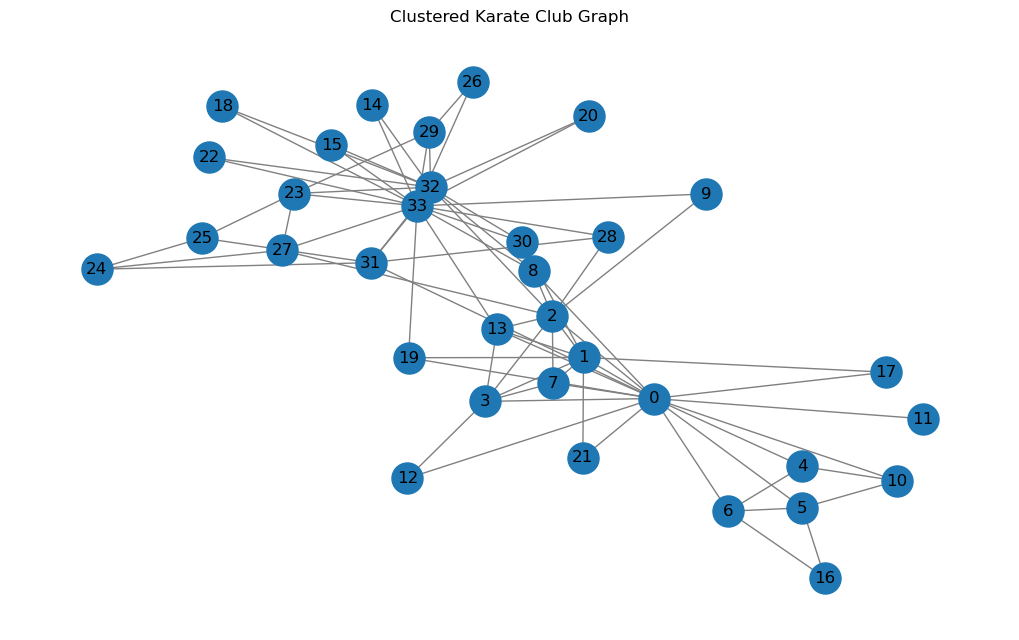

In [84]:


G = nx.karate_club_graph()
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_size=500, edge_color='gray')
plt.title('Clustered Karate Club Graph')
plt.show()

In [86]:

adj_matrix = nx.to_numpy_array(G)

degree_correlation_matrix = np.corrcoef(adj_matrix)

print(degree_correlation_matrix)



[[ 1.          0.44838021  0.22541386 ... -0.34146334 -0.27933208
  -0.40032658]
 [ 0.44838021  1.          0.33365152 ... -0.11661843 -0.15684984
  -0.1987942 ]
 [ 0.22541386  0.33365152  1.         ...  0.0179954  -0.22517619
   0.06717256]
 ...
 [-0.34146334 -0.11661843  0.0179954  ...  1.         -0.04011476
  -0.06645219]
 [-0.27933208 -0.15684984 -0.22517619 ... -0.04011476  1.
   0.43925112]
 [-0.40032658 -0.1987942   0.06717256 ... -0.06645219  0.43925112
   1.        ]]


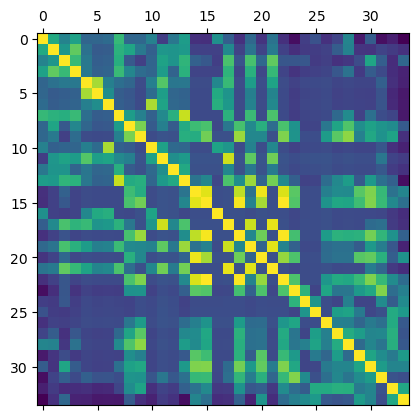

In [65]:

plt.matshow(degree_correlation_matrix)
plt.show()

## Clustering Orginal Graph

In [76]:
clusters =Modularity_Clustering(G)

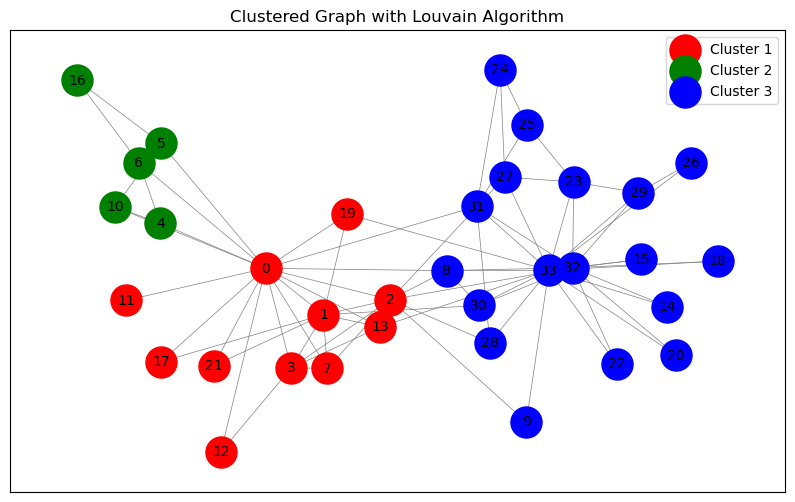

In [77]:
Plot_Comminuty(G, clusters)

## Clustering By Thresholding 

In [88]:
threshold = 0.4  

adj_matrix_thresholded = np.where(degree_correlation_matrix >= threshold, 1, 0)
np.fill_diagonal(adj_matrix_thresholded, 0)

print("ماتریس مجاورت گراف با استفاده از thresholding:")
print(adj_matrix_thresholded)

ماتریس مجاورت گراف با استفاده از thresholding:
[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]


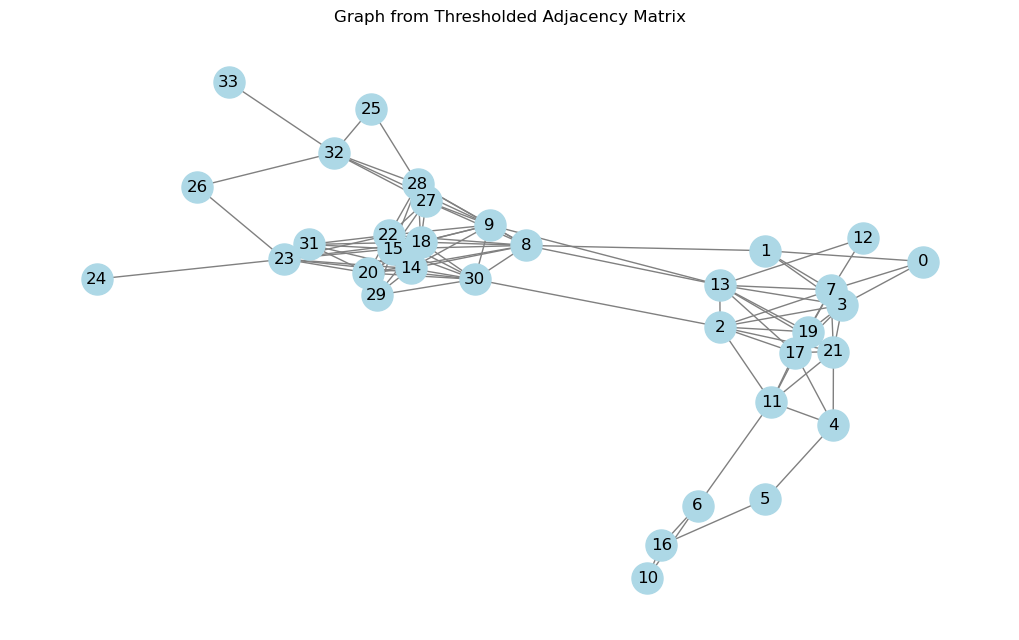

In [89]:

G_thresholded = nx.Graph(adj_matrix_thresholded)

plt.figure(figsize=(10, 6))
nx.draw(G_thresholded, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
plt.title('Graph from Thresholded Adjacency Matrix')
plt.show()

In [90]:

clusters = Modularity_Clustering(G_thresholded)

print("communities:", clusters)


communities: {1: [0, 1, 2, 3, 4, 7, 11, 12, 13, 17, 19, 21], 2: [5, 6, 10, 16], 3: [8, 14, 15, 18, 20, 22, 23, 24, 29, 30, 31], 0: [9, 25, 26, 27, 28, 32, 33]}


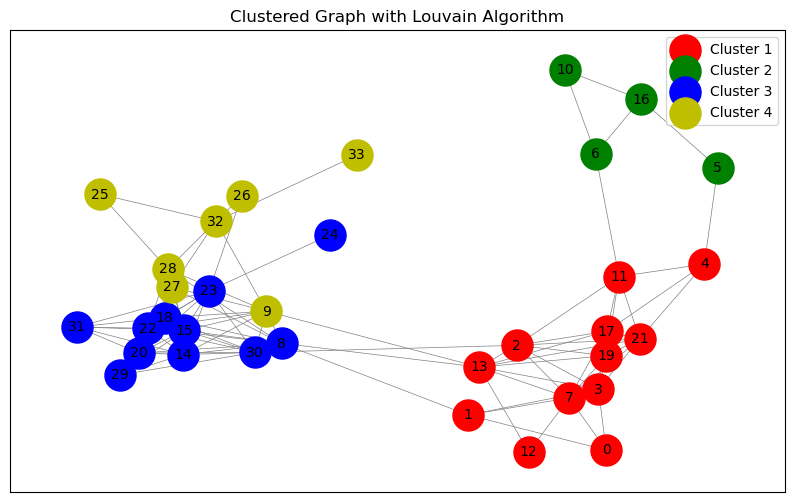

In [91]:
Plot_Comminuty(G_thresholded, clusters)

## Clustering by Thresholding and permutation 

In [92]:
permuted_thresholded_adj_matrix = np.random.permutation(adj_matrix_thresholded)
np.fill_diagonal(permuted_thresholded_adj_matrix, 0)

print(permuted_thresholded_adj_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


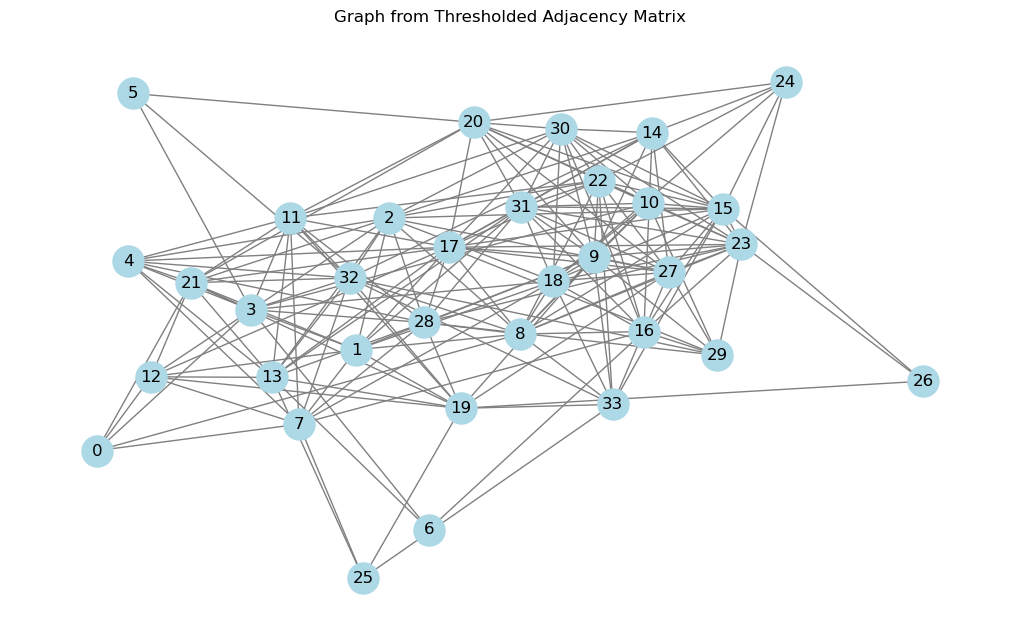

In [93]:

G_permuted_thresholded = nx.Graph(permuted_thresholded_adj_matrix)

plt.figure(figsize=(10, 6))
nx.draw(G_permuted_thresholded, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
plt.title('Graph from Thresholded Adjacency Matrix')
plt.show()

In [99]:
ali = []

ali.lengh

AttributeError: 'list' object has no attribute 'lengh'

In [94]:

clusters = Modularity_Clustering(G_permuted_thresholded)

print("communities:", clusters)


communities: {0: [0, 1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 19, 21, 25, 28, 32], 1: [8, 9, 10, 14, 15, 16, 17, 18, 20, 22, 23, 24, 26, 27, 29, 30, 31, 33]}


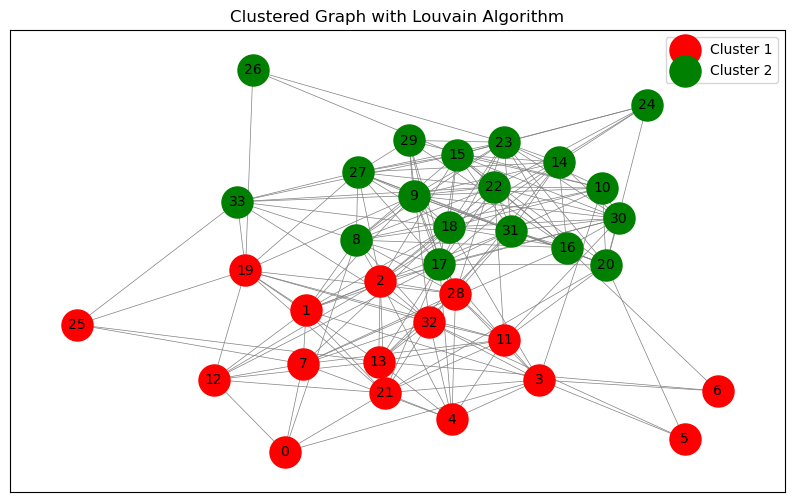

In [95]:
Plot_Comminuty(G_permuted_thresholded, clusters)